In [1]:
import WECGrid

engine = WECGrid.Engine("./IEEE_30_bus.RAW")
engine.use(["psse","pypsa"])

PSS®E software initialized
PyPSA software initialized


In [2]:
engine.apply_wecs(sim_id=1, ibus=31)

WEC components added to PyPSA network.
WEC components added to PSS®E network.


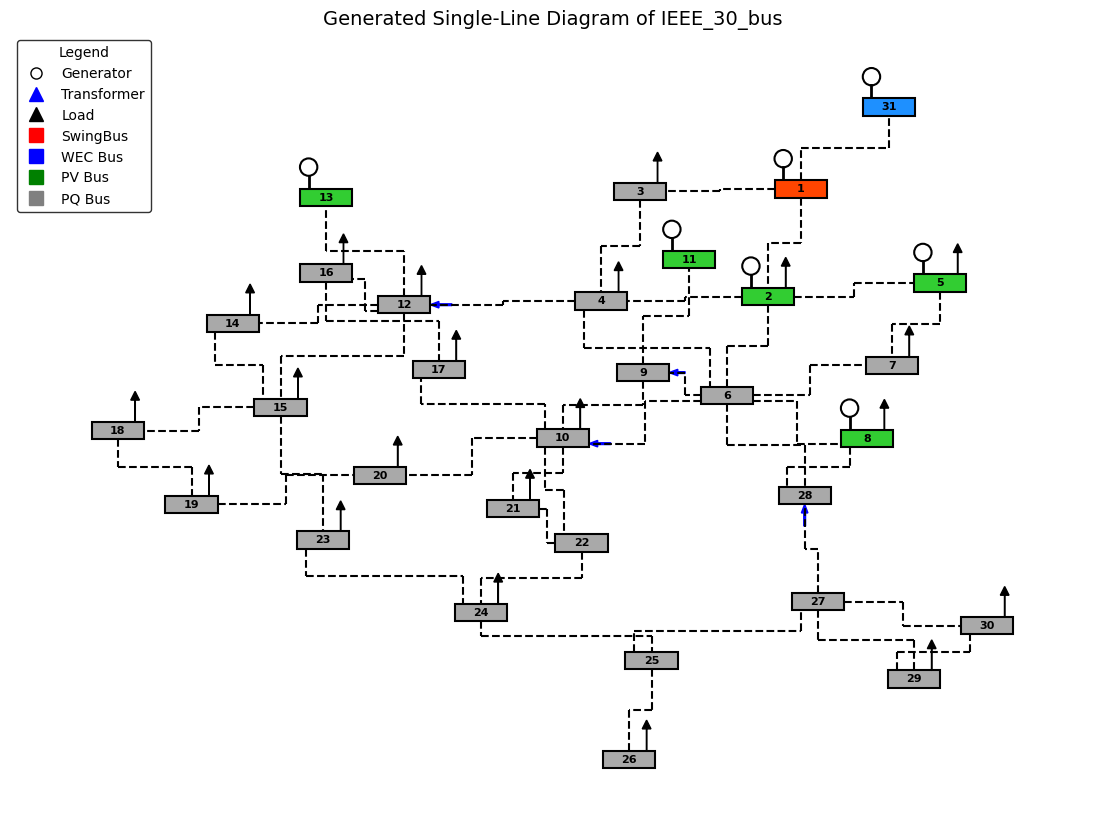

In [3]:
engine.sld()

Simulating on PSS®E...


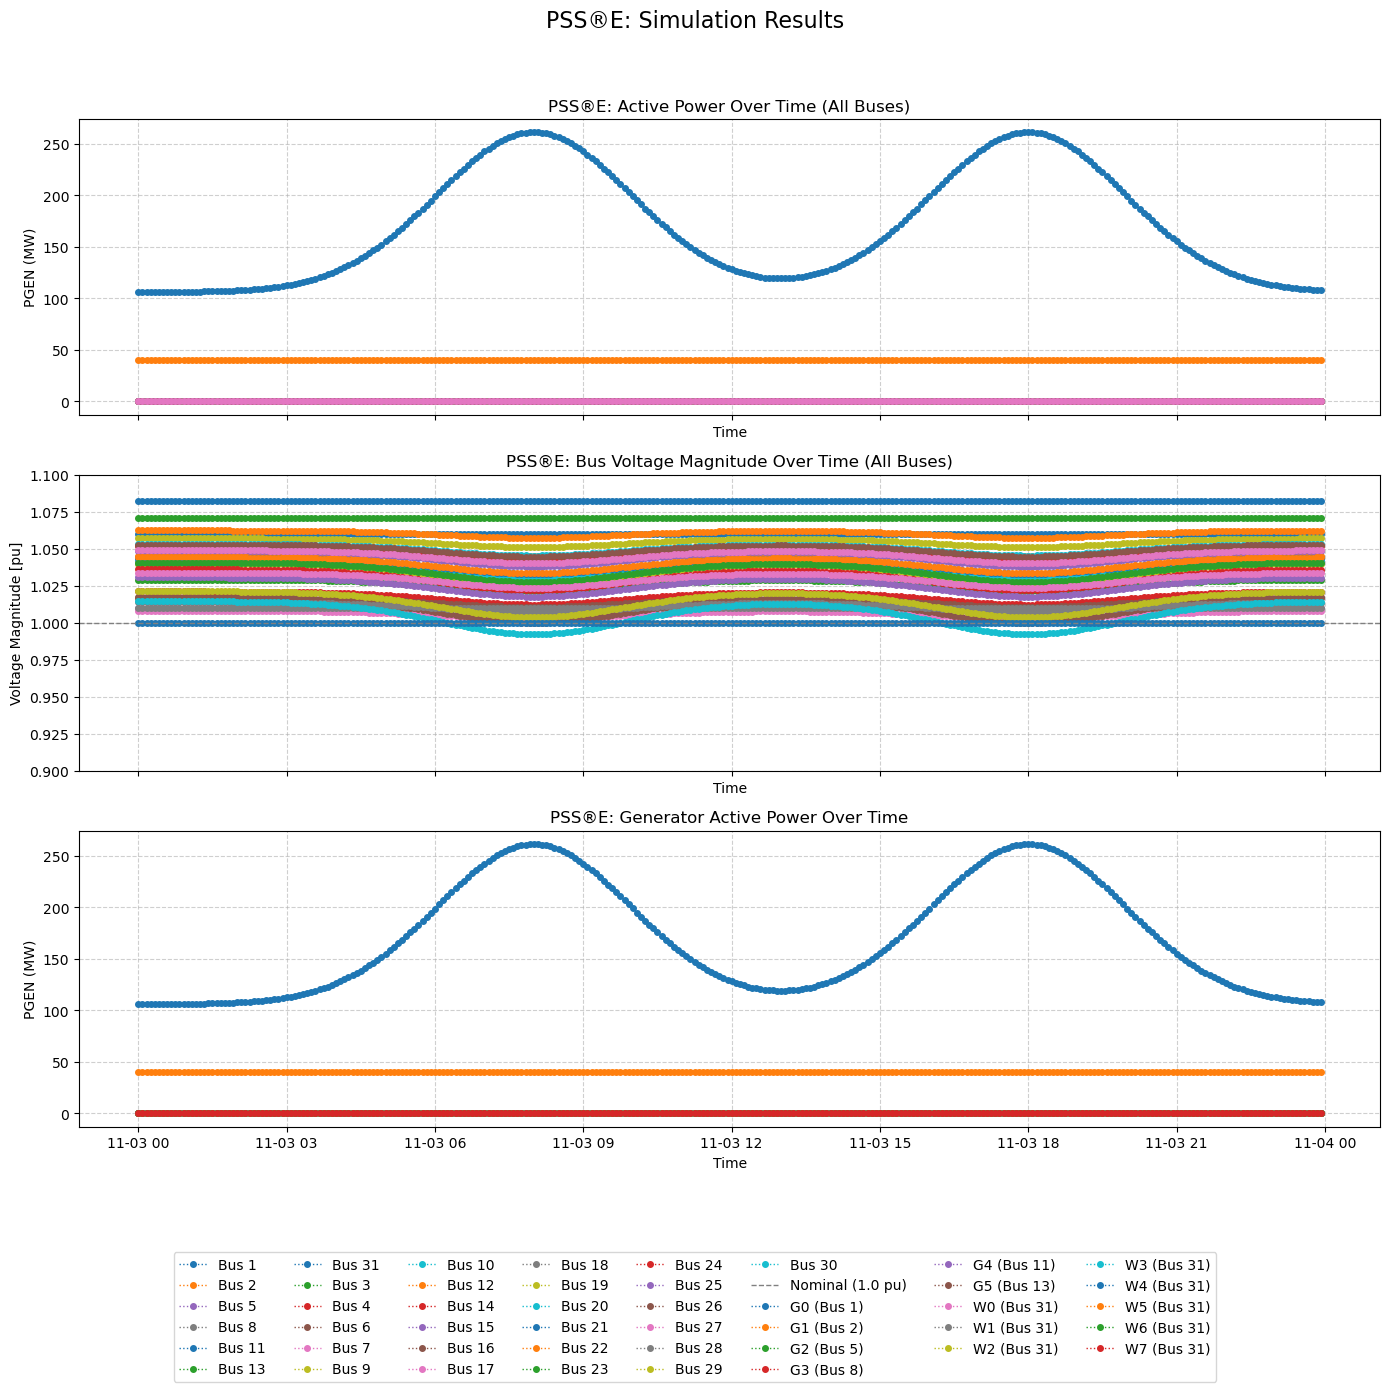

PSS®E simulation complete in 10.578072547912598 seconds. 

Simulating on PyPSA...


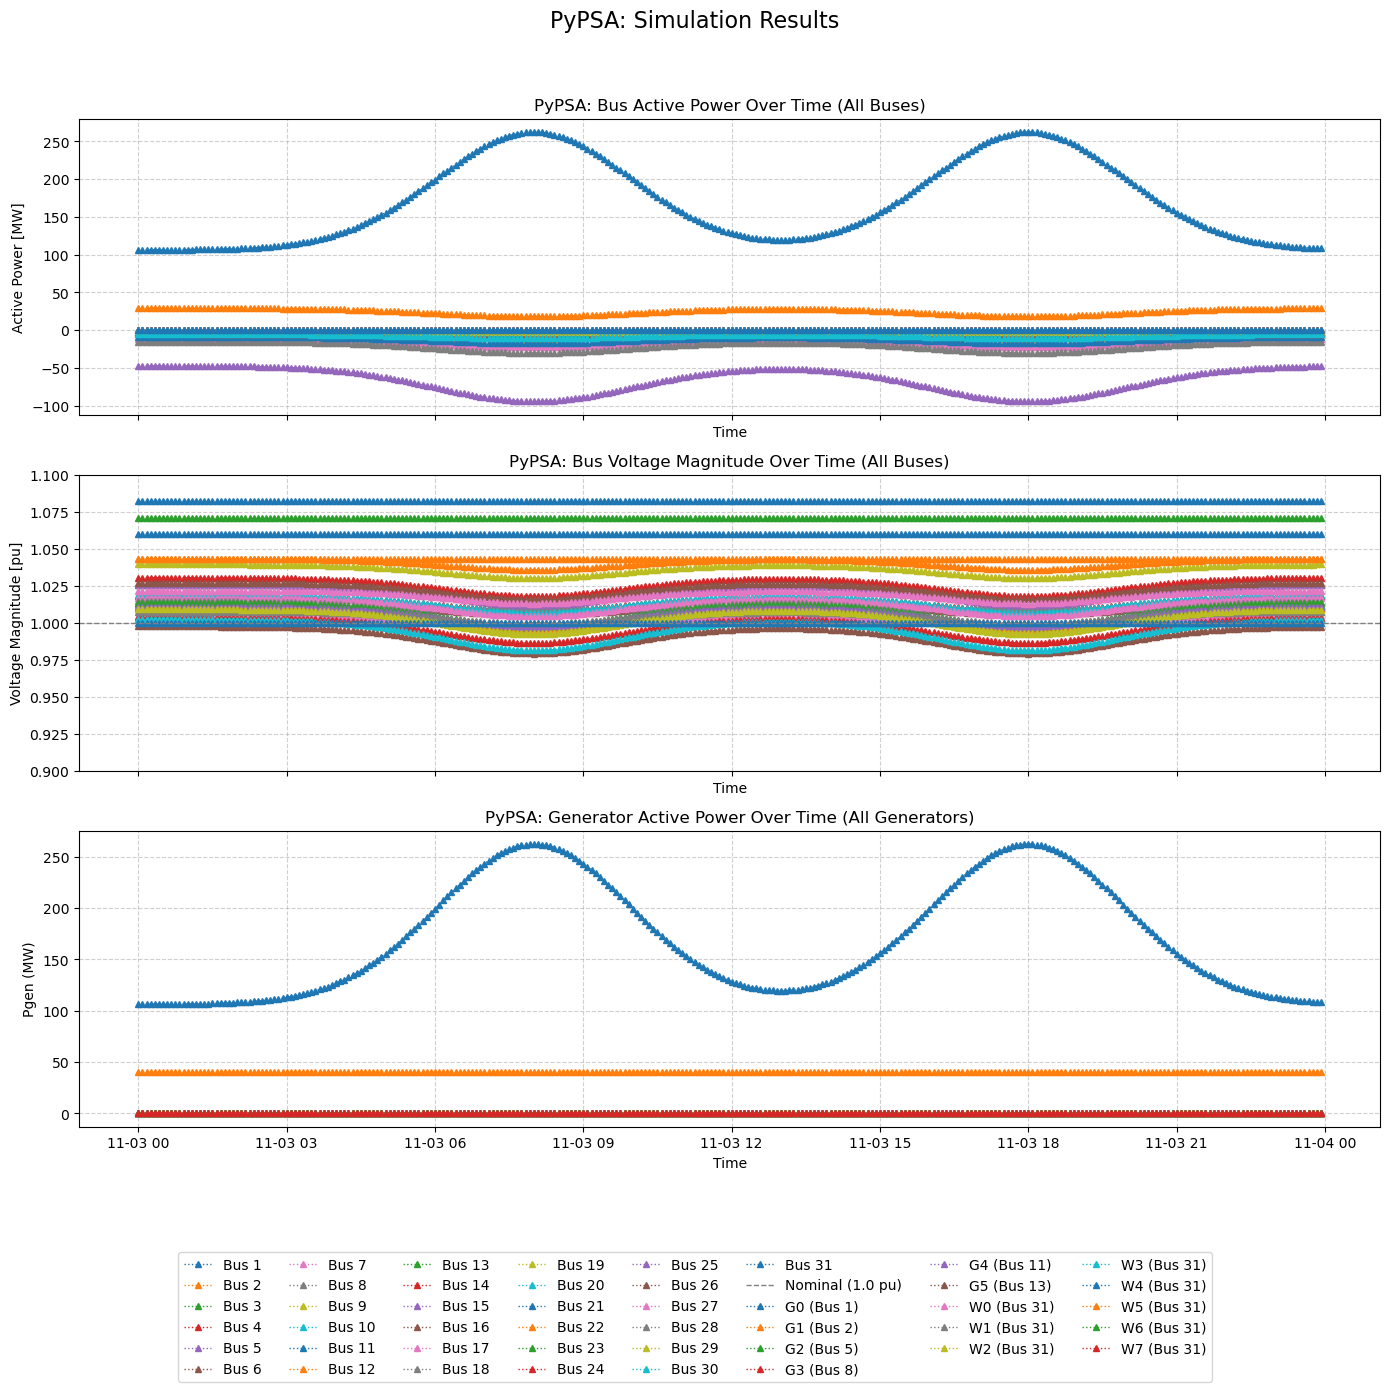

PyPSA simulation complete in 12.804237604141235 seconds. 



In [4]:
engine.simulate()

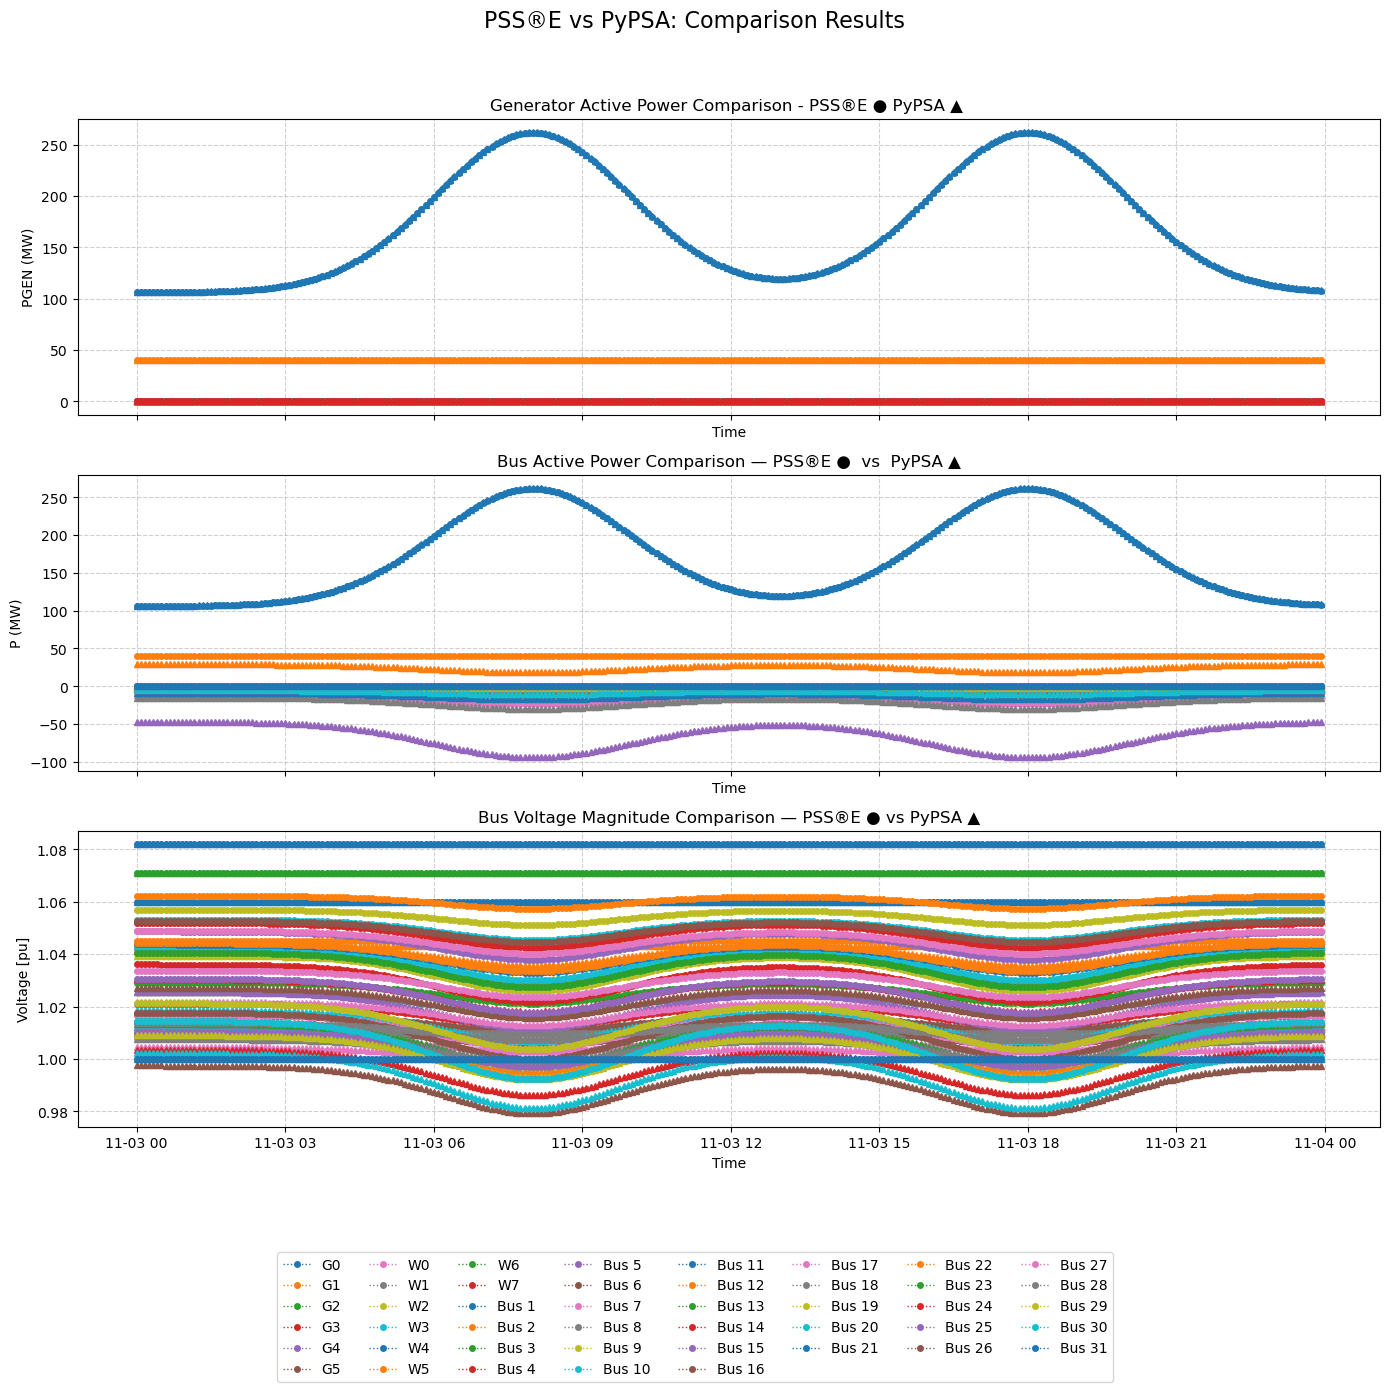

In [5]:
engine.compare_results()

In [6]:
engine.generator_compare

,Generator,Parameter,RMSE
0,G0,P,5.413032e-01
1,G1,P,0.000000e+00
2,G2,P,0.000000e+00
3,G3,P,0.000000e+00
4,G4,P,0.000000e+00
5,G5,P,0.000000e+00
6,W0,P,5.397262e-10
7,W1,P,5.397262e-10
8,W2,P,5.397262e-10
9,W3,P,5.397262e-10


In [7]:
engine.bus_compare

,Bus,Parameter,RMSE
0,1,P,5.413032e-01
1,10,P,4.233309e+00
2,11,P,0.000000e+00
3,12,P,8.174666e+00
4,13,P,0.000000e+00
...,...,...,...
26,5,V_mag,1.150642e-08
27,6,V_mag,4.743072e-03
28,7,V_mag,3.729504e-03
29,8,V_mag,9.536743e-09


In [8]:
engine.save_simulation(sim_name="IEEE30 bus SoftwareX example", 
                       notes = "Example simulation of IEEE 30 bus system using WECGrid. This simulation uses both PSSE and PyPSA engines to demonstrate the capabilities of WECGrid. We applied 8 WECs to bus 31 with a 2 peaking load curve."
)

In [8]:
sim_results = engine.pull_sim()

In [12]:
sim_results['psse_gen']

dict_keys(['p_mw', 'q_mvar'])

In [28]:
pypsa_bus = engine.pypsa.network.buses_t
pypsa_gen = engine.pypsa.network.generators_t

for timestamp in pypsa_bus.p.index:
    for bus in pypsa_bus.p.columns:
        break

In [32]:
pypsa_bus.v_mag_pu.at[timestamp, bus]

1.06

In [21]:
 for timestamp in psse_bus.p.index:
    for bus in psse_bus.p.columns:
        pass
    for gen in psse_gen.p.columns:
        break

In [14]:
timestamp

Timestamp('1997-11-03 23:55:00')

In [24]:
psse_gen.q.at[timestamp, gen]

49.337501525878906

In [25]:
psse_gen.keys()

dict_keys(['p', 'q'])

In [17]:
psse_bus.q.at[timestamp, bus]

AttributeError: 'TimeSeriesDict' object has no attribute 'q'

In [8]:
pypsa_bus = engine.pypsa.network.buses_t.p

In [7]:
psse_bus = engine.psse.bus_dataframe_t.p
psse_bus.index

DatetimeIndex(['1997-11-03 00:00:00', '1997-11-03 00:05:00',
               '1997-11-03 00:10:00', '1997-11-03 00:15:00',
               '1997-11-03 00:20:00', '1997-11-03 00:25:00',
               '1997-11-03 00:30:00', '1997-11-03 00:35:00',
               '1997-11-03 00:40:00', '1997-11-03 00:45:00',
               ...
               '1997-11-03 23:10:00', '1997-11-03 23:15:00',
               '1997-11-03 23:20:00', '1997-11-03 23:25:00',
               '1997-11-03 23:30:00', '1997-11-03 23:35:00',
               '1997-11-03 23:40:00', '1997-11-03 23:45:00',
               '1997-11-03 23:50:00', '1997-11-03 23:55:00'],
              dtype='datetime64[ns]', name='snapshot', length=288, freq=None)

In [10]:
psse_cols = set(map(str, psse_bus.columns))
pypsa_cols = set(map(str, pypsa_bus.columns))
common_keys = sorted(psse_cols & pypsa_cols, key=lambda x: int(x))

In [18]:
pypsa_bus[common_keys[0]]

snapshot
1997-11-03 00:00:00    106.564416
1997-11-03 00:05:00    106.391678
1997-11-03 00:10:00    106.472259
1997-11-03 00:15:00    106.486332
1997-11-03 00:20:00    106.471958
                          ...    
1997-11-03 23:35:00    109.401448
1997-11-03 23:40:00    109.060236
1997-11-03 23:45:00    108.790118
1997-11-03 23:50:00    108.521825
1997-11-03 23:55:00    108.249869
Freq: 5T, Name: 1, Length: 288, dtype: float64

KeyError: '1'

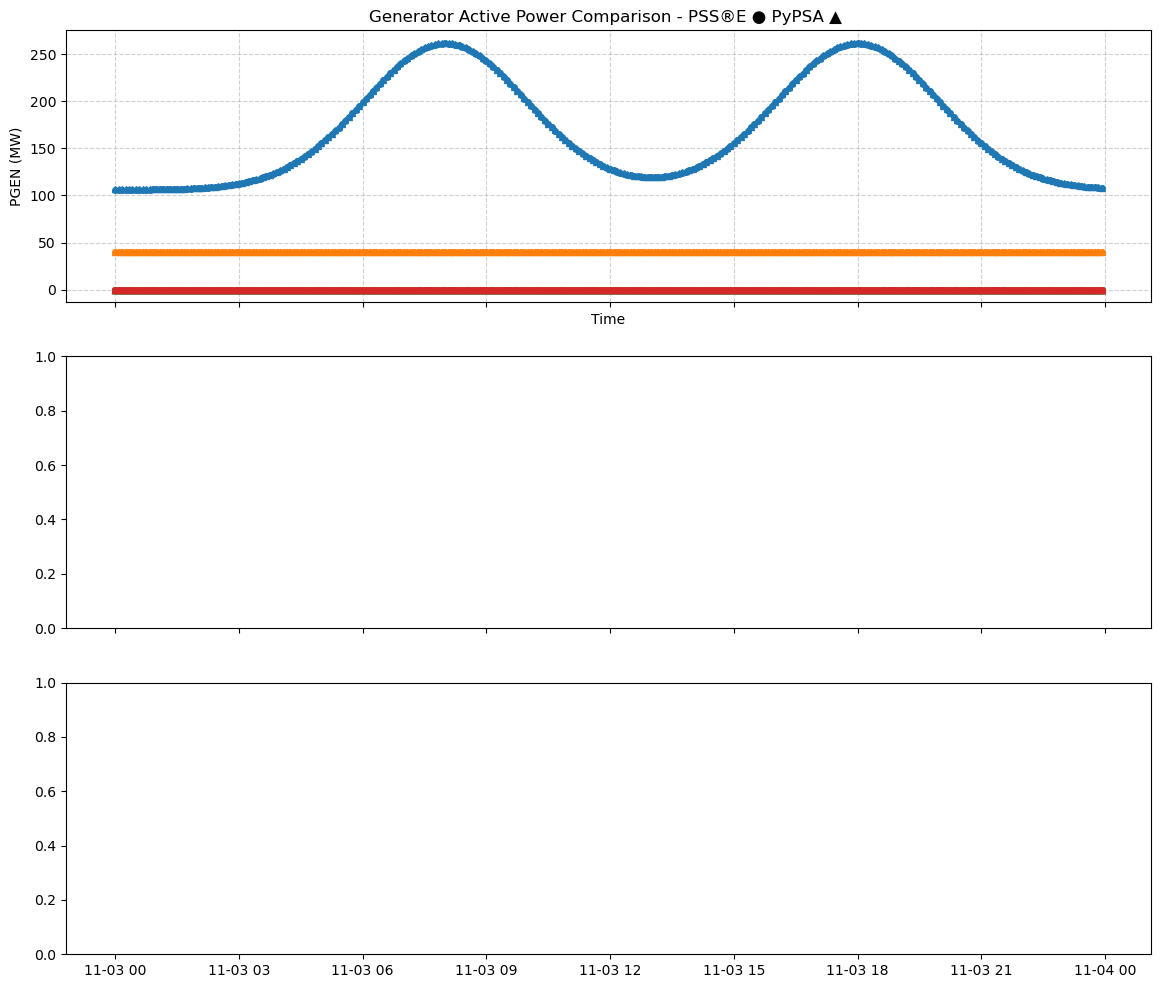

In [5]:
engine.compare_results()

In [ ]:
engine.save_simulation(sim_name="IEEE30 bus SoftwareX example", 
                       notes = "Example simulation of IEEE 30 bus system using WECGrid. This simulation uses both PSSE and PyPSA engines to demonstrate the capabilities of WECGrid. We applied 8 WECs to bus 31 with a 2 peaking load curve."
)

In [8]:
import pandas as pd
import numpy as np

def compute_rmse_corr(psse_df, pypsa_df, label_prefix):
    common = sorted(set(psse_df.columns).intersection(set(pypsa_df.columns)), key=str)
    results = []
    for key in common:
        psse_series = psse_df[key]
        pypsa_series = pypsa_df[key]
        rmse = np.sqrt(((psse_series - pypsa_series) ** 2).mean())
        corr = psse_series.corr(pypsa_series)
        results.append({
            "Name": f"{label_prefix}{key}",
            "RMSE": round(rmse, 4),
            "Corr": round(corr, 4)
        })
    return pd.DataFrame(results)

In [24]:
bus_p_df = compute_rmse_corr(
    engine.psse.bus_dataframe_t.p,
    engine.pypsa.network.buses_t.p,
    label_prefix="Bus_P "
)
bus_p_df

""


In [29]:
psse_df = engine.psse.bus_dataframe_t.p

pypsa_df = engine.pypsa.network.buses_t.p

common = sorted(set(psse_df.columns).intersection(set(pypsa_df.columns)), key=str)
common

[]

In [30]:
pypsa_df.columns

Index(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13',
       '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25',
       '26', '27', '28', '29', '30', '31'],
      dtype='object', name='Bus')

In [31]:
psse_df.columns

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
            18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
           dtype='int64')

In [22]:
# What is G1 doing across time?
engine.psse.generator_dataframe_t.p["G1"].unique()
engine.pypsa.network.generators_t.p["G1"].unique()

array([40.])

In [16]:
engine.pypsa.network.generators_t.p["G1"]

snapshot
1997-11-03 00:00:00    40.0
1997-11-03 00:05:00    40.0
1997-11-03 00:10:00    40.0
1997-11-03 00:15:00    40.0
1997-11-03 00:20:00    40.0
                       ... 
1997-11-03 23:35:00    40.0
1997-11-03 23:40:00    40.0
1997-11-03 23:45:00    40.0
1997-11-03 23:50:00    40.0
1997-11-03 23:55:00    40.0
Freq: 5T, Name: G1, Length: 288, dtype: float64

In [10]:
gen_df

,Name,RMSE,Corr
0,Gen G0,0.5413,1.0
1,Gen G1,0.0000,NaN
2,Gen G2,0.0000,NaN
3,Gen G3,0.0000,NaN
4,Gen G4,0.0000,NaN
5,Gen G5,0.0000,NaN
6,Gen W0,0.0000,1.0
7,Gen W1,0.0000,1.0
8,Gen W2,0.0000,1.0
9,Gen W3,0.0000,1.0


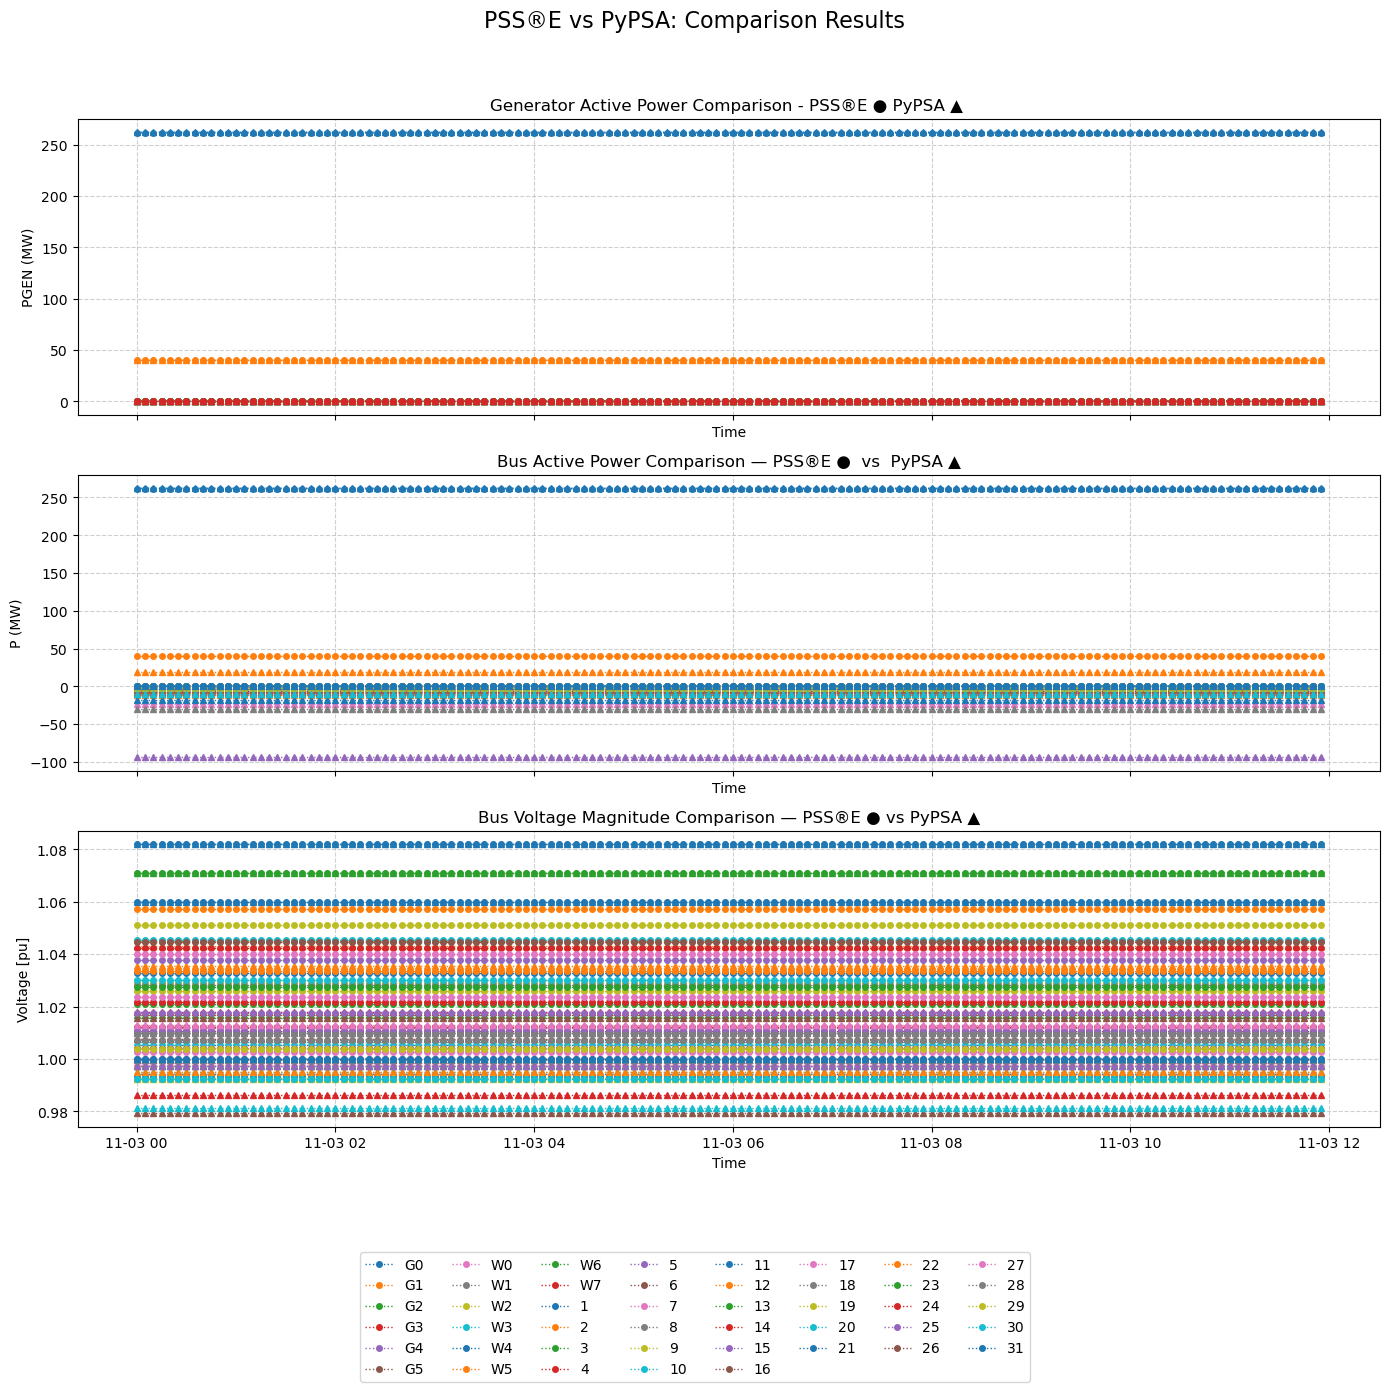

In [4]:
engine.plot_comparison()

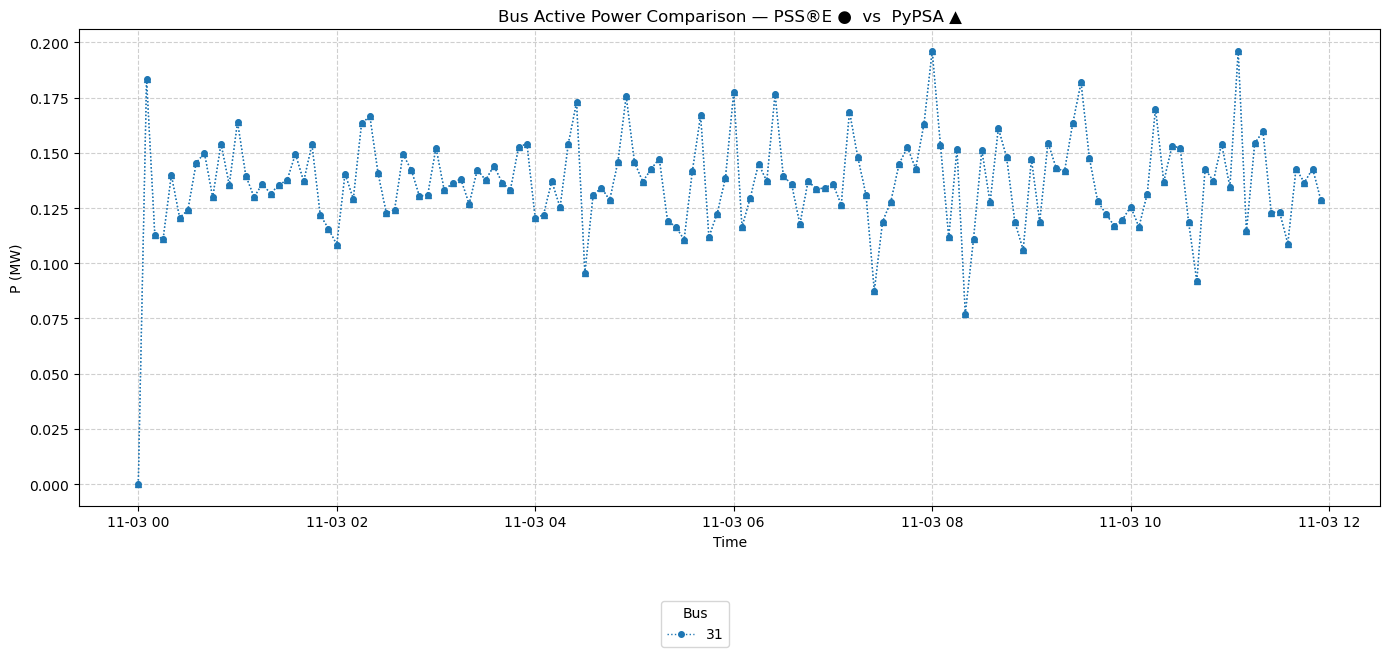

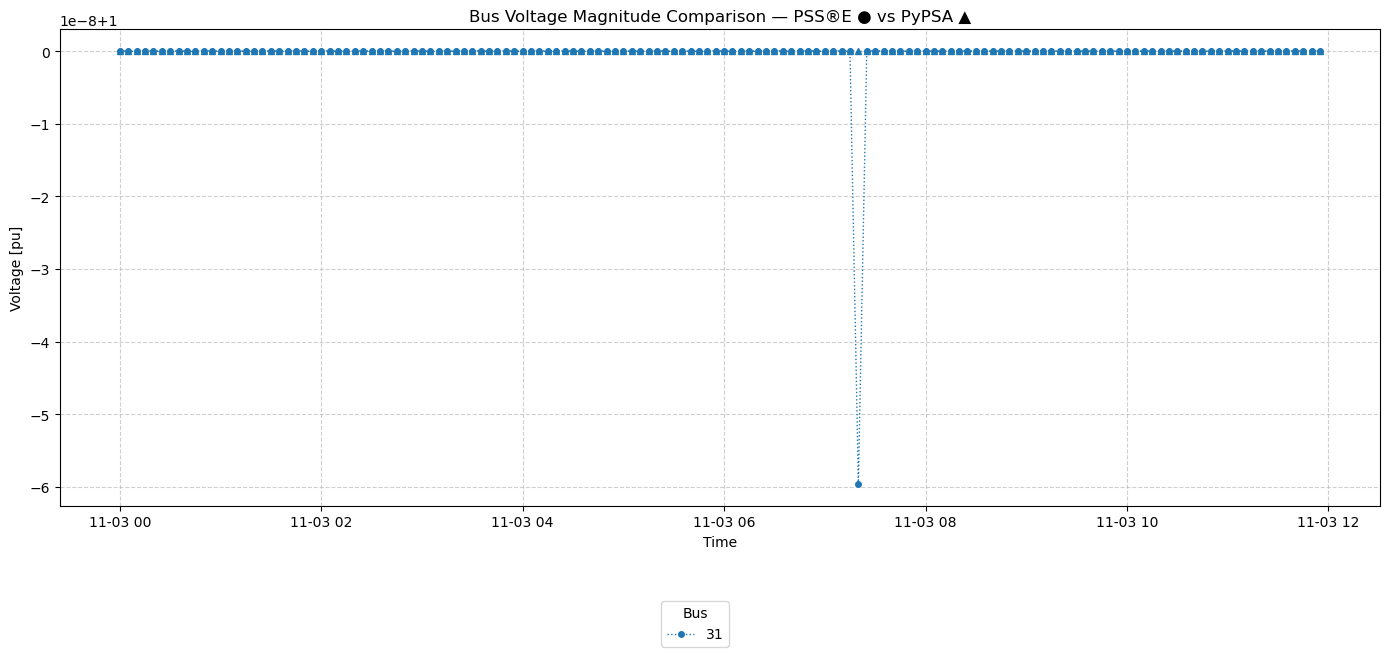

In [8]:
engine.plot_bus_power_comparison(31)
engine.plot_bus_vmag_comparison(31)

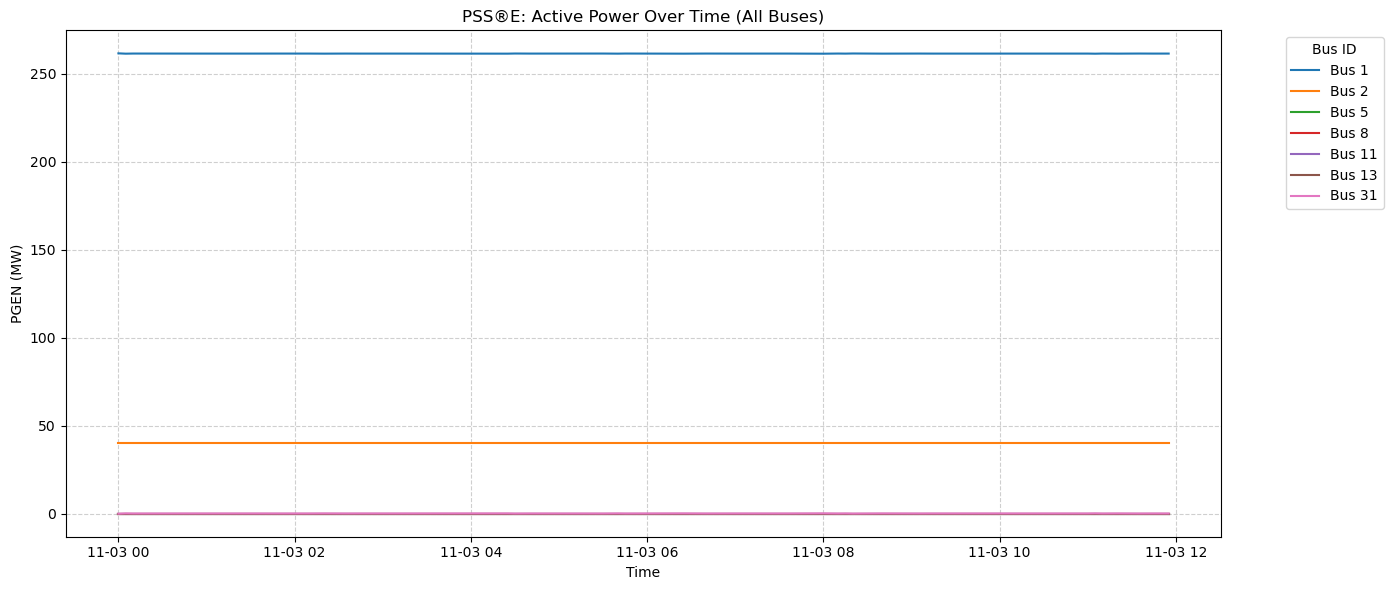

In [5]:
engine.psse.viz.plot_bus_power()

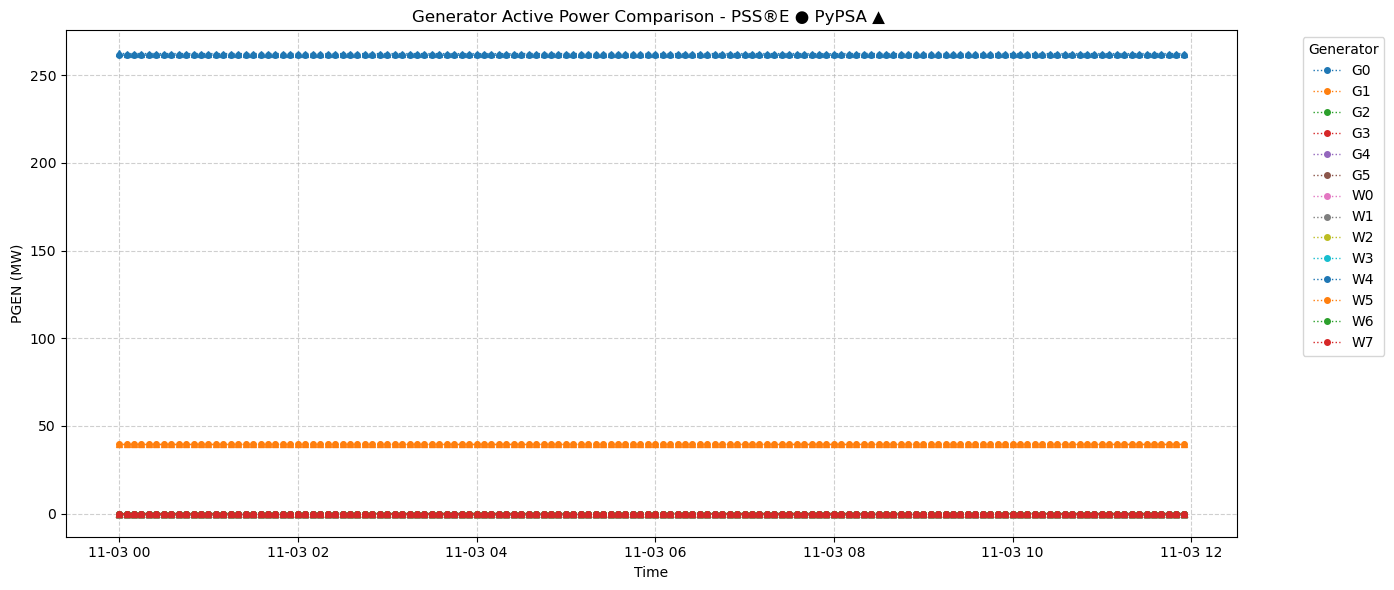

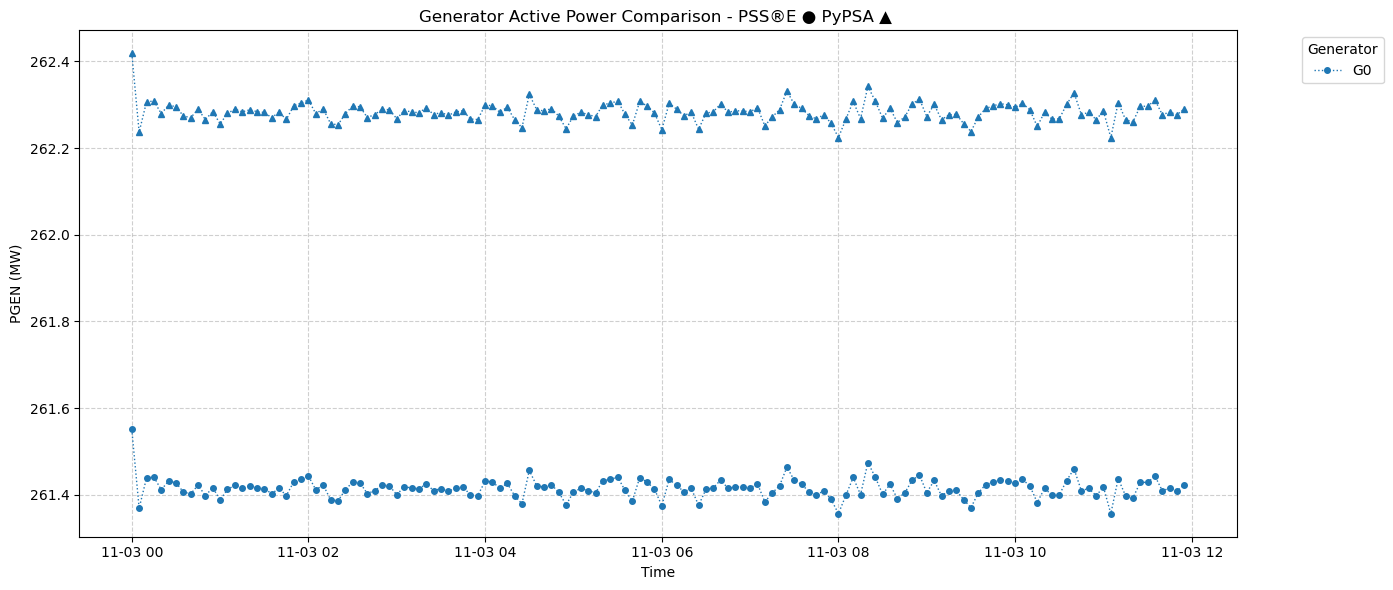

In [ ]:
engine.plot_generator_comparison()
engine.plot_generator_comparison('G0')

In [6]:
engine.psse.bus_dataframe_t.p

,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
snapshot,,,,,,,,,,,,,,,,,,,,,
1997-11-03 00:00:00,261.550659,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1997-11-03 00:05:00,261.368866,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.183366
1997-11-03 00:10:00,261.438873,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.112763
1997-11-03 00:15:00,261.440613,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.111001
1997-11-03 00:20:00,261.411896,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.139954
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1997-11-03 11:35:00,261.442780,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.108818
1997-11-03 11:40:00,261.409088,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.142802
1997-11-03 11:45:00,261.415283,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.136530


In [5]:
engine.pypsa.network.buses_t.p

Bus,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
snapshot,,,,,,,,,,,,,,,,,,,,,
1997-11-03 00:00:00,262.418495,18.3,-2.4,-7.6,-94.2,0.0,-22.8,-30.0,0.0,-5.8,...,0.0,-3.2,-8.7,0.0,-3.5,0.0,0.0,-2.4,-10.6,0.000000
1997-11-03 00:05:00,262.236689,18.3,-2.4,-7.6,-94.2,0.0,-22.8,-30.0,0.0,-5.8,...,0.0,-3.2,-8.7,0.0,-3.5,0.0,0.0,-2.4,-10.6,0.183366
1997-11-03 00:10:00,262.306688,18.3,-2.4,-7.6,-94.2,0.0,-22.8,-30.0,0.0,-5.8,...,0.0,-3.2,-8.7,0.0,-3.5,0.0,0.0,-2.4,-10.6,0.112763
1997-11-03 00:15:00,262.308435,18.3,-2.4,-7.6,-94.2,0.0,-22.8,-30.0,0.0,-5.8,...,0.0,-3.2,-8.7,0.0,-3.5,0.0,0.0,-2.4,-10.6,0.111001
1997-11-03 00:20:00,262.279729,18.3,-2.4,-7.6,-94.2,0.0,-22.8,-30.0,0.0,-5.8,...,0.0,-3.2,-8.7,0.0,-3.5,0.0,0.0,-2.4,-10.6,0.139954
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1997-11-03 11:35:00,262.310599,18.3,-2.4,-7.6,-94.2,0.0,-22.8,-30.0,0.0,-5.8,...,0.0,-3.2,-8.7,0.0,-3.5,0.0,0.0,-2.4,-10.6,0.108818
1997-11-03 11:40:00,262.276905,18.3,-2.4,-7.6,-94.2,0.0,-22.8,-30.0,0.0,-5.8,...,0.0,-3.2,-8.7,0.0,-3.5,0.0,0.0,-2.4,-10.6,0.142802
1997-11-03 11:45:00,262.283124,18.3,-2.4,-7.6,-94.2,0.0,-22.8,-30.0,0.0,-5.8,...,0.0,-3.2,-8.7,0.0,-3.5,0.0,0.0,-2.4,-10.6,0.136530


In [25]:
psspy = engine.psse.psspy
import pandas as pd
import numpy as np

In [ ]:
# --- Generator power by bus ---
ierr_gbus, gen_bus_ids = psspy.amachint(string=["NUMBER"])
ierr_pgen, pgens = psspy.amachreal(string=["PGEN"])
ierr_qgen, qgens = psspy.amachreal(string=["QGEN"])

gen_df = pd.DataFrame({
    "BUS_ID": gen_bus_ids[0],
    "P_GEN": pgens[0],
    "Q_GEN": qgens[0]
}).groupby("BUS_ID").sum()


# --- Load power by bus (complex) ---
ierr_lbus, load_bus_ids = psspy.aloadint(string=["NUMBER"])
ierr_cplx, load_cplx = psspy.aloadcplx(string=["TOTALACT"])  # complex: P + jQ

load_complex = np.array(load_cplx[0])
load_p = np.real(load_complex)
load_q = np.imag(load_complex)

load_df = pd.DataFrame({
    "BUS_ID": load_bus_ids[0],
    "P_LOAD": load_p,
    "Q_LOAD": load_q
}).groupby("BUS_ID").sum()

# assuming `bus_df` contains the core bus snapshot info
bus_df = bus_df.merge(gen_df, on="BUS_ID", how="left").fillna(0)
bus_df = bus_df.merge(load_df, on="BUS_ID", how="left").fillna(0)

# Net injection
bus_df["P_NET"] = bus_df["P_GEN"] - bus_df["P_LOAD"]
bus_df["Q_NET"] = bus_df["Q_GEN"] - bus_df["Q_LOAD"]

NameError: name 'bus_df' is not defined

In [29]:
gen_df

,P_GEN,Q_GEN
BUS_ID,,
1,261.423218,18.031906
2,40.000000,56.069542
5,0.000000,35.658817
8,0.000000,36.111320
11,0.000000,16.057459
13,0.000000,10.450726
31,0.128532,-36.275948


In [30]:
load_df

,P_LOAD,Q_LOAD
BUS_ID,,
2,21.700001,12.700001
3,2.400000,1.200000
4,7.600000,1.600000
5,94.199997,19.000000
7,22.799999,10.900000
8,30.000002,30.000002
10,5.800000,2.000000
12,11.200000,7.500000
14,6.200000,1.600000


In [14]:
gen_df = pd.DataFrame({
    "BUS_ID": gen_bus_ids[0],
    "P_GEN": pgens[0],
    "Q_GEN": qgens[0]
}).groupby("BUS_ID").sum()


In [15]:
gen_df

,P_GEN,Q_GEN
BUS_ID,,
1,261.423218,18.031906
2,40.000000,56.069542
5,0.000000,35.658817
8,0.000000,36.111320
11,0.000000,16.057459
13,0.000000,10.450726
31,0.128532,-36.275948


In [6]:
engine.pypsa.bus_dataframe

attribute,v_nom,type,x,y,carrier,unit,v_mag_pu_set,v_mag_pu_min,v_mag_pu_max,control,sub_network,generator
Bus,,,,,,,,,,,,
1,132.0,,0.0,0.0,AC,None,1.06000,0.9,1.1,Slack,0,G0
2,132.0,,0.0,0.0,AC,None,1.04313,0.9,1.1,PV,0,G1
3,132.0,,0.0,0.0,AC,None,1.02074,0.9,1.1,PQ,0,NaN
4,132.0,,0.0,0.0,AC,None,1.01176,0.9,1.1,PQ,0,NaN
5,132.0,,0.0,0.0,AC,None,1.01000,0.9,1.1,PV,0,G2
6,132.0,,0.0,0.0,AC,None,1.01026,0.9,1.1,PQ,0,NaN
7,132.0,,0.0,0.0,AC,None,1.00238,0.9,1.1,PQ,0,NaN
8,132.0,,0.0,0.0,AC,None,1.01000,0.9,1.1,PV,0,G3
9,1.0,,0.0,0.0,AC,None,1.05091,0.9,1.1,PQ,0,NaN


In [41]:
class TimeSeriesDict(dict):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        for key, val in kwargs.items():
            self[key] = val
            setattr(self, key, val)

    def __setitem__(self, key, value):
        super().__setitem__(key, value)
        setattr(self, key, value)

In [ ]:
import pandas as pd
import pandas as pd


class TimeSeriesDict(dict):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        for key, val in kwargs.items():
            self[key] = val
            setattr(self, key, val)

    def __setitem__(self, key, value):
        super().__setitem__(key, value)
        setattr(self, key, value)
        
def collect_gen_data(self):
    """
    Mimics PyPSA's generators_t dictionary behavior
    """
    p_data, q_data = [], []
    times = []

    for snap in self.snapshot_history:
        gen_df = snap.generators
        if gen_df is None or gen_df.empty:
            continue

        gen_df = gen_df.copy()
        gen_df["GEN_NAME"] = gen_df["GEN_ID"]

        p_row = gen_df.set_index("GEN_NAME")["PGEN_MW"].to_dict()
        q_row = gen_df.set_index("GEN_NAME")["QGEN_MVAR"].to_dict()

        p_data.append(p_row)
        q_data.append(q_row)
        times.append(pd.to_datetime(snap.snapshot))

    p_df = pd.DataFrame(p_data, index=pd.DatetimeIndex(times)).sort_index()
    q_df = pd.DataFrame(q_data, index=pd.DatetimeIndex(times)).sort_index()

    return TimeSeriesDict(p=p_df, q=q_df)

t = collect_gen_data()

In [46]:
t.p

,G0,G1,G2,G3,G4,G5,W0,W1,W2,W3,W4,W5,W6,W7
1997-11-03 00:00:00,261.550659,40.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1997-11-03 00:05:00,261.368866,40.0,0.0,0.0,0.0,0.0,0.022921,0.022921,0.022921,0.022921,0.022921,0.022921,0.022921,0.022921
1997-11-03 00:10:00,261.438873,40.0,0.0,0.0,0.0,0.0,0.014095,0.014095,0.014095,0.014095,0.014095,0.014095,0.014095,0.014095
1997-11-03 00:15:00,261.440613,40.0,0.0,0.0,0.0,0.0,0.013875,0.013875,0.013875,0.013875,0.013875,0.013875,0.013875,0.013875
1997-11-03 00:20:00,261.411896,40.0,0.0,0.0,0.0,0.0,0.017494,0.017494,0.017494,0.017494,0.017494,0.017494,0.017494,0.017494
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1997-11-03 11:35:00,261.442780,40.0,0.0,0.0,0.0,0.0,0.013602,0.013602,0.013602,0.013602,0.013602,0.013602,0.013602,0.013602
1997-11-03 11:40:00,261.409088,40.0,0.0,0.0,0.0,0.0,0.017850,0.017850,0.017850,0.017850,0.017850,0.017850,0.017850,0.017850
1997-11-03 11:45:00,261.415283,40.0,0.0,0.0,0.0,0.0,0.017066,0.017066,0.017066,0.017066,0.017066,0.017066,0.017066,0.017066
1997-11-03 11:50:00,261.409058,40.0,0.0,0.0,0.0,0.0,0.017854,0.017854,0.017854,0.017854,0.017854,0.017854,0.017854,0.017854


In [32]:
generators_t

In [ ]:
# collect all the bus_dataframes over the simulation time


for snap in engine.psse.snapshot_history:
    snap
    break

In [14]:
snap.generators.GEN_ID

0     G0
1     G1
2     G2
3     G3
4     G4
5     G5
6     W0
7     W1
8     W2
9     W3
10    W4
11    W5
12    W6
13    W7
Name: GEN_ID, dtype: object

In [ ]:
snap.snapshot

Timestamp('1997-11-03 00:00:00', freq='5T')

In [47]:
engine.pypsa.network.generators_t.p

Generator,G0,G1,G2,G3,G4,G5,W0,W1,W2,W3,W4,W5,W6,W7
snapshot,,,,,,,,,,,,,,
1997-11-03 00:00:00,262.418495,40.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1997-11-03 00:05:00,262.236689,40.0,0.0,0.0,0.0,0.0,0.022921,0.022921,0.022921,0.022921,0.022921,0.022921,0.022921,0.022921
1997-11-03 00:10:00,262.306688,40.0,0.0,0.0,0.0,0.0,0.014095,0.014095,0.014095,0.014095,0.014095,0.014095,0.014095,0.014095
1997-11-03 00:15:00,262.308435,40.0,0.0,0.0,0.0,0.0,0.013875,0.013875,0.013875,0.013875,0.013875,0.013875,0.013875,0.013875
1997-11-03 00:20:00,262.279729,40.0,0.0,0.0,0.0,0.0,0.017494,0.017494,0.017494,0.017494,0.017494,0.017494,0.017494,0.017494
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1997-11-03 11:35:00,262.310599,40.0,0.0,0.0,0.0,0.0,0.013602,0.013602,0.013602,0.013602,0.013602,0.013602,0.013602,0.013602
1997-11-03 11:40:00,262.276905,40.0,0.0,0.0,0.0,0.0,0.017850,0.017850,0.017850,0.017850,0.017850,0.017850,0.017850,0.017850
1997-11-03 11:45:00,262.283124,40.0,0.0,0.0,0.0,0.0,0.017066,0.017066,0.017066,0.017066,0.017066,0.017066,0.017066,0.017066
